In [6]:
# -----IMPORTANDO LIBRERIAS----

import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [7]:
#Leyendo el archivo y eliminando la columna ID

df = pd.read_csv("telecom_churn_ml_preparado.csv")
df = df.drop(columns=["customerID"])
df.head()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0.0,0.112676,0.471144,0.066294,False,True,True,True,False,False,...,True,False,False,True,False,True,False,False,True,0
1,0.0,0.112676,0.414428,0.060420,True,False,False,True,False,True,...,False,False,True,False,False,False,False,False,True,0
2,0.0,0.042254,0.553731,0.030239,True,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,1
3,1.0,0.169014,0.793532,0.140670,True,True,False,True,False,False,...,True,False,True,False,False,True,False,True,False,1
4,1.0,0.028169,0.653234,0.028687,False,True,False,True,False,False,...,True,False,False,False,False,True,False,False,True,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   float64
 1   tenure                                 7032 non-null   float64
 2   Charges.Monthly                        7032 non-null   float64
 3   Charges.Total                          7032 non-null   float64
 4   gender_Male                            7032 non-null   bool   
 5   Partner_Yes                            7032 non-null   bool   
 6   Dependents_Yes                         7032 non-null   bool   
 7   PhoneService_Yes                       7032 non-null   bool   
 8   MultipleLines_No phone service         7032 non-null   bool   
 9   MultipleLines_Yes                      7032 non-null   bool   
 10  InternetService_Fiber optic            7032 non-null   bool   
 11  Inte

In [9]:
df.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,0.442560,0.463166,0.261309,0.265785
std,0.368844,0.345708,0.299363,0.261571,0.441782
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.112676,0.172512,0.044155,0.000000
50%,0.000000,0.394366,0.518408,0.159090,0.000000
75%,0.000000,0.760563,0.712562,0.435719,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


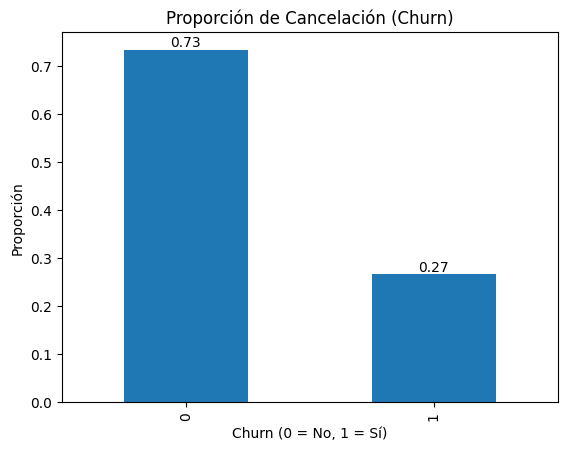

In [10]:
#Verificación de Desbalance de Clases


churn_counts = df["Churn"].value_counts(normalize=True)

ax = churn_counts.plot(kind="bar")

plt.title("Proporción de Cancelación (Churn)")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Proporción")

# Agregar etiquetas
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom")

plt.show()



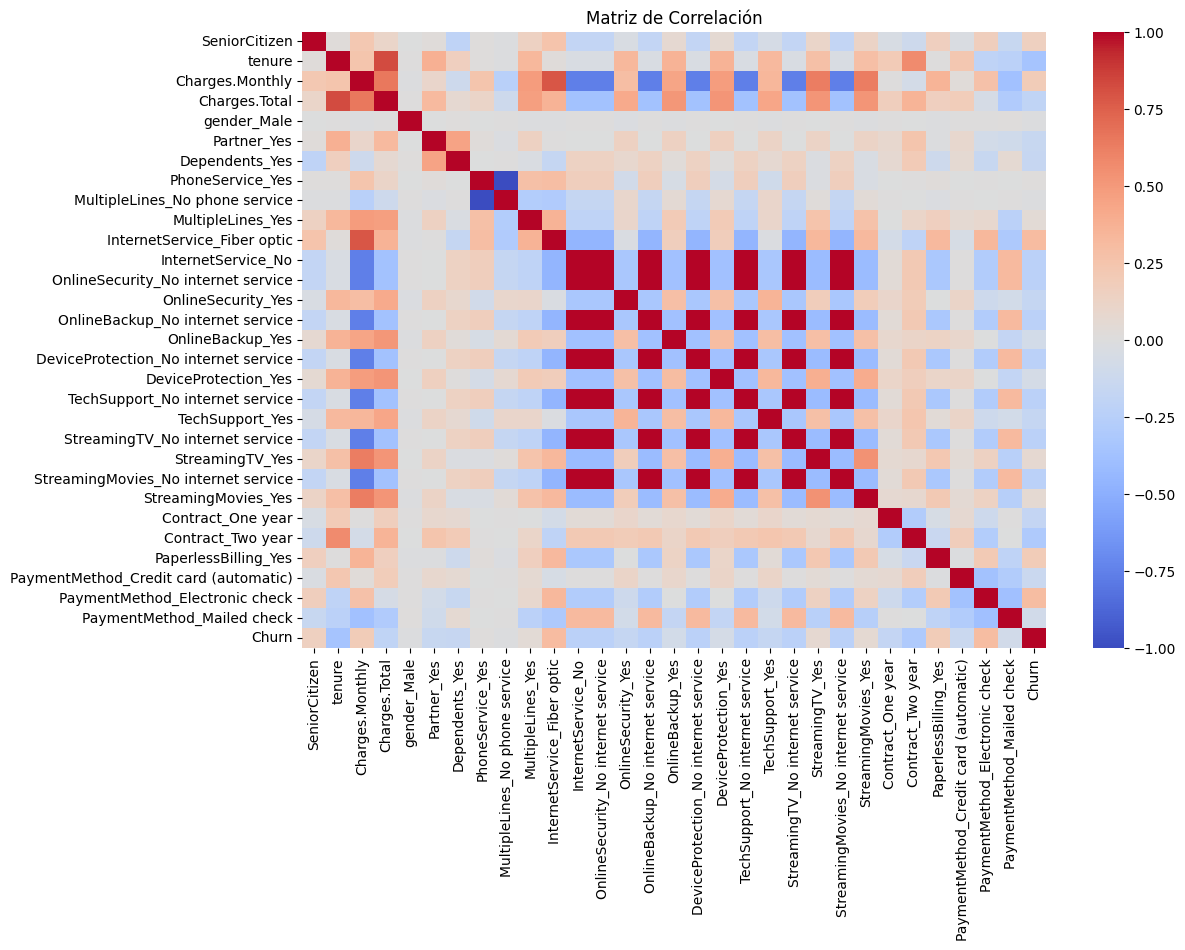

In [11]:
#Matriz de correlación

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()


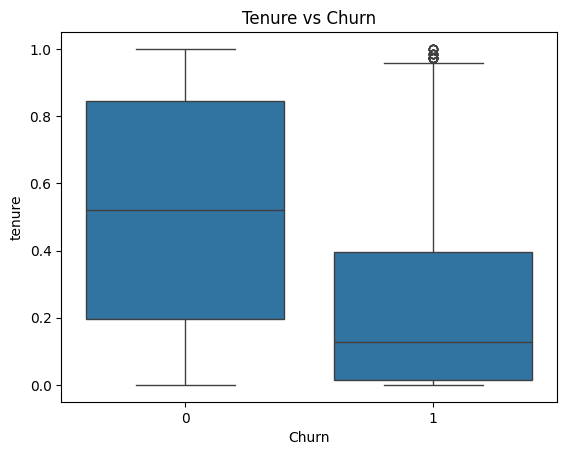

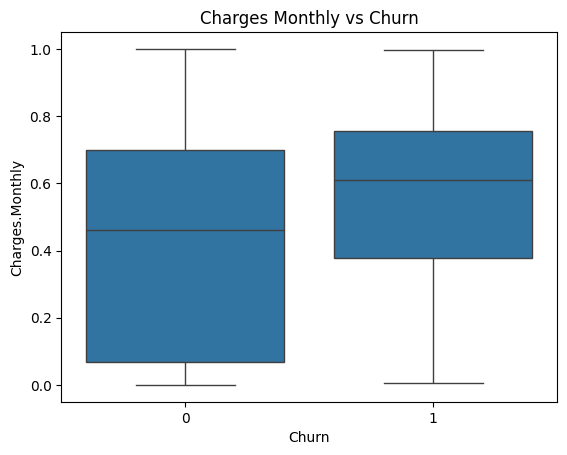

In [12]:
# analisis tenure vs churn y Charges.Monthly vs churn

sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure vs Churn")
plt.show()

sns.boxplot(x="Churn", y="Charges.Monthly", data=df)
plt.title("Charges Monthly vs Churn")
plt.show()


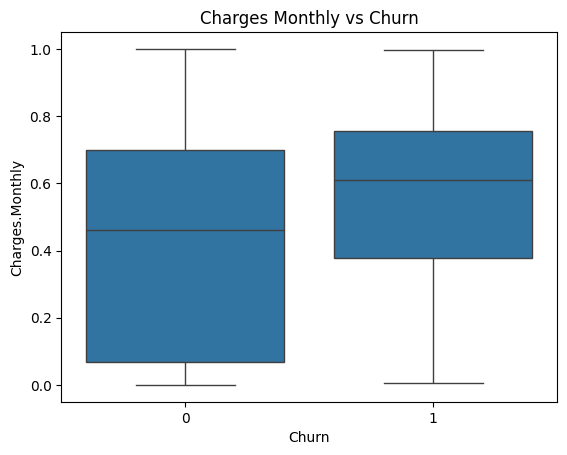

In [13]:
sns.boxplot(x="Churn", y="Charges.Monthly", data=df)
plt.title("Charges Monthly vs Churn")
plt.show()


#Modelado Predictivo

In [14]:
#Separación de datos
from sklearn.model_selection import train_test_split

X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


#Modelo 1: Regresión Logística

In [15]:
# Entrenamiento

from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [16]:
#Predicción

y_pred_log = log_model.predict(X_test)


In [17]:
#Evaluación

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Accuracy: 0.8014218009478673
[[1391  158]
 [ 261  300]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.66      0.53      0.59       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.79      2110



#Modelo 2: Random Forest

In [18]:
# Entrenamiento
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [19]:
#Predicciones

y_pred_rf = rf_model.predict(X_test)


In [20]:
# Evaluación

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.7848341232227488
[[1398  151]
 [ 303  258]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1549
           1       0.63      0.46      0.53       561

    accuracy                           0.78      2110
   macro avg       0.73      0.68      0.70      2110
weighted avg       0.77      0.78      0.77      2110



#Importancia de Variables (Regresión Logística)

In [21]:
import pandas as pd

coef_df = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": log_model.coef_[0]
})

coef_df = coef_df.sort_values(by="Coeficiente", ascending=False)
coef_df.head(10)


,Variable,Coeficiente
3,Charges.Total,1.161604
10,InternetService_Fiber optic,0.831819
28,PaymentMethod_Electronic check,0.399193
26,PaperlessBilling_Yes,0.364799
21,StreamingTV_Yes,0.271067
0,SeniorCitizen,0.253433
9,MultipleLines_Yes,0.184431
23,StreamingMovies_Yes,0.177830
8,MultipleLines_No phone service,0.105089
29,PaymentMethod_Mailed check,0.041908


In [22]:
coef_df.tail(10)


,Variable,Coeficiente
18,TechSupport_No internet service,-0.115293
16,DeviceProtection_No internet service,-0.115293
20,StreamingTV_No internet service,-0.115293
15,OnlineBackup_Yes,-0.132715
13,OnlineSecurity_Yes,-0.289459
7,PhoneService_Yes,-0.300240
19,TechSupport_Yes,-0.396786
24,Contract_One year,-0.701635
25,Contract_Two year,-1.236960
1,tenure,-2.976482


In [23]:
import joblib
joblib.dump(log_model, "log_model.pkl")

['log_model.pkl']

In [24]:
X.columns.tolist()


['SeniorCitizen',
 'tenure',
 'Charges.Monthly',
 'Charges.Total',
 'gender_Male',
 'Partner_Yes',
 'Dependents_Yes',
 'PhoneService_Yes',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_Yes',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

In [25]:
import pandas as pd

importance = pd.DataFrame({
    "feature": X.columns,
    "importance": abs(log_model.coef_[0])
}).sort_values(by="importance", ascending=False)

importance.to_csv("feature_importance.csv", index=False)
